In [2]:
import os, sys

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

from biotite.structure.io.pdb import PDBFile
from biotite import structure as struct

from foldingdiff import plotting

In [3]:
sctm_table = pd.read_csv(
    "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/sctm_scores_proteinmpnn_tm_scores.csv",
    index_col=0,
)
sctm_table.head()

,id,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable
0,generated_202,0.39745,0.46674,70,1,3,omegafold_predictions_proteinmpnn/generated_20...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False
1,generated_414,0.36039,0.46756,91,2,2,omegafold_predictions_proteinmpnn/generated_41...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
2,generated_309,0.49600,0.60337,80,4,0,omegafold_predictions_proteinmpnn/generated_30...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
3,generated_529,0.29100,0.36524,102,0,6,omegafold_predictions_proteinmpnn/generated_52...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
4,generated_194,0.42942,0.47160,69,3,2,omegafold_predictions_proteinmpnn/generated_19...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False


In [4]:
def get_bfactors(pdb_fname: str) -> np.ndarray:
    """Read b-factor values from the given pdb file"""
    # https://www.biotite-python.org/apidoc/biotite.structure.io.pdb.PDBFile.html
    pdb_file = PDBFile.read(pdb_fname)
    atoms = pdb_file.get_structure(extra_fields=['b_factor'])[0]
    return atoms.b_factor

omegafold_base_dir = "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/omegafold_predictions_proteinmpnn"

b_factor_values = []
for best_sctm in sctm_table['scTM best match']:
    pdb_fname = os.path.join(omegafold_base_dir, os.path.basename(best_sctm))
    assert os.path.isfile(pdb_fname)
    b_factor_values.append(get_bfactors(pdb_fname).mean())
sctm_table['mean_bfactor_omegafold'] = b_factor_values
sctm_table.head()

,id,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable,mean_bfactor_omegafold
0,generated_202,0.39745,0.46674,70,1,3,omegafold_predictions_proteinmpnn/generated_20...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False,59.714363
1,generated_414,0.36039,0.46756,91,2,2,omegafold_predictions_proteinmpnn/generated_41...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False,72.120667
2,generated_309,0.49600,0.60337,80,4,0,omegafold_predictions_proteinmpnn/generated_30...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False,89.080214
3,generated_529,0.29100,0.36524,102,0,6,omegafold_predictions_proteinmpnn/generated_52...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False,77.357681
4,generated_194,0.42942,0.47160,69,3,2,omegafold_predictions_proteinmpnn/generated_19...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False,61.577973


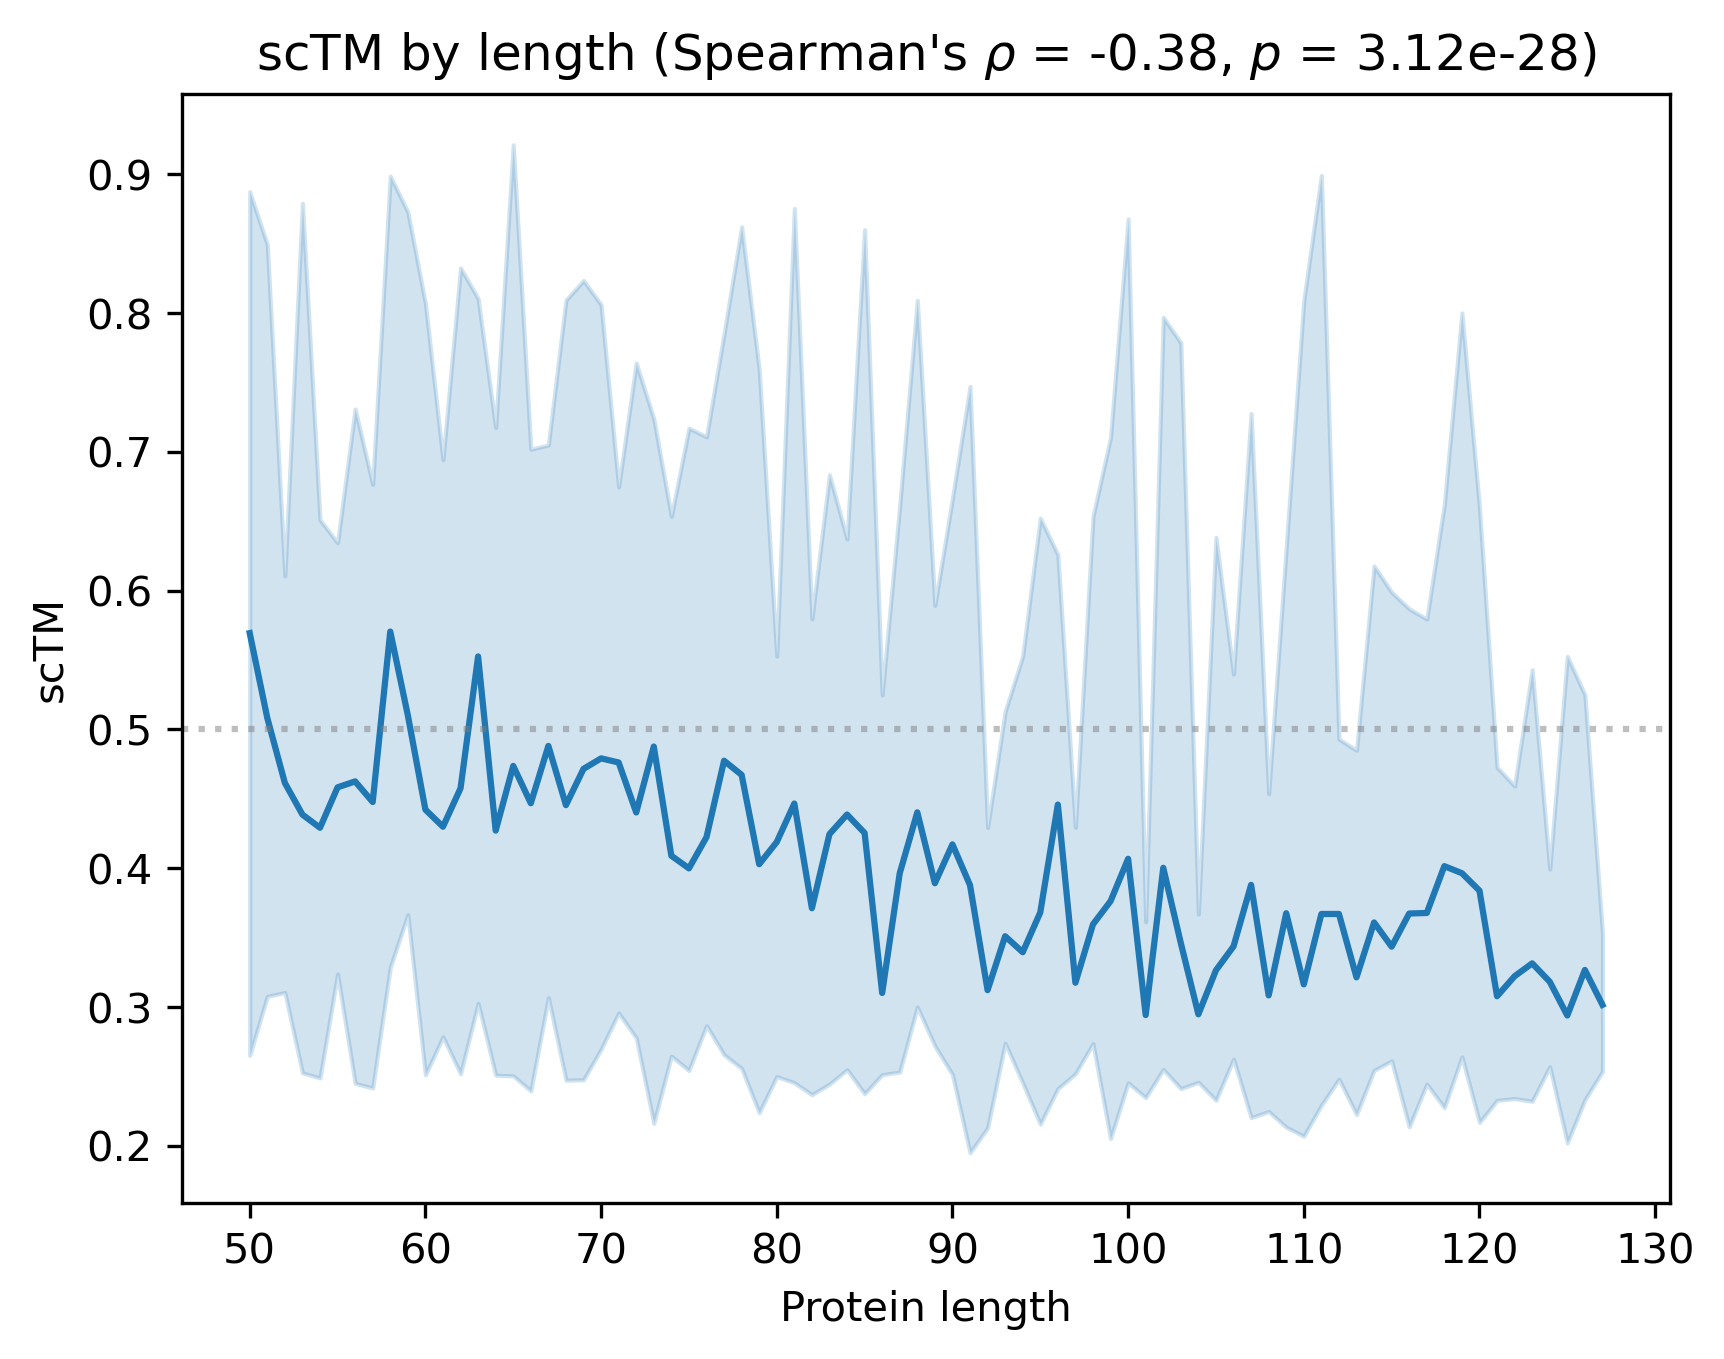

In [5]:
corr, pval = stats.spearmanr(sctm_table['length_int'], sctm_table['scTM'])

fig, ax = plt.subplots(dpi=300)
sns.lineplot(
    data=sctm_table,
    x='length_int',
    y='scTM',
    ax=ax,
    errorbar=lambda x: (np.min(x), np.max(x)),
    estimator=np.mean,
)
ax.axhline(0.5, alpha=0.5, linestyle='dotted', color='tab:grey')
ax.set(
    xlabel="Protein length",
    ylabel="scTM",
    title="scTM by length (Spearman's $\\rho$ = {:.2f}, $p$ = {:.2e})".format(corr, pval),
)
fig.savefig(
    os.path.join(plotting.PLOT_DIR, "sctm_by_len.pdf"),
    bbox_inches='tight',
)
fig.show()

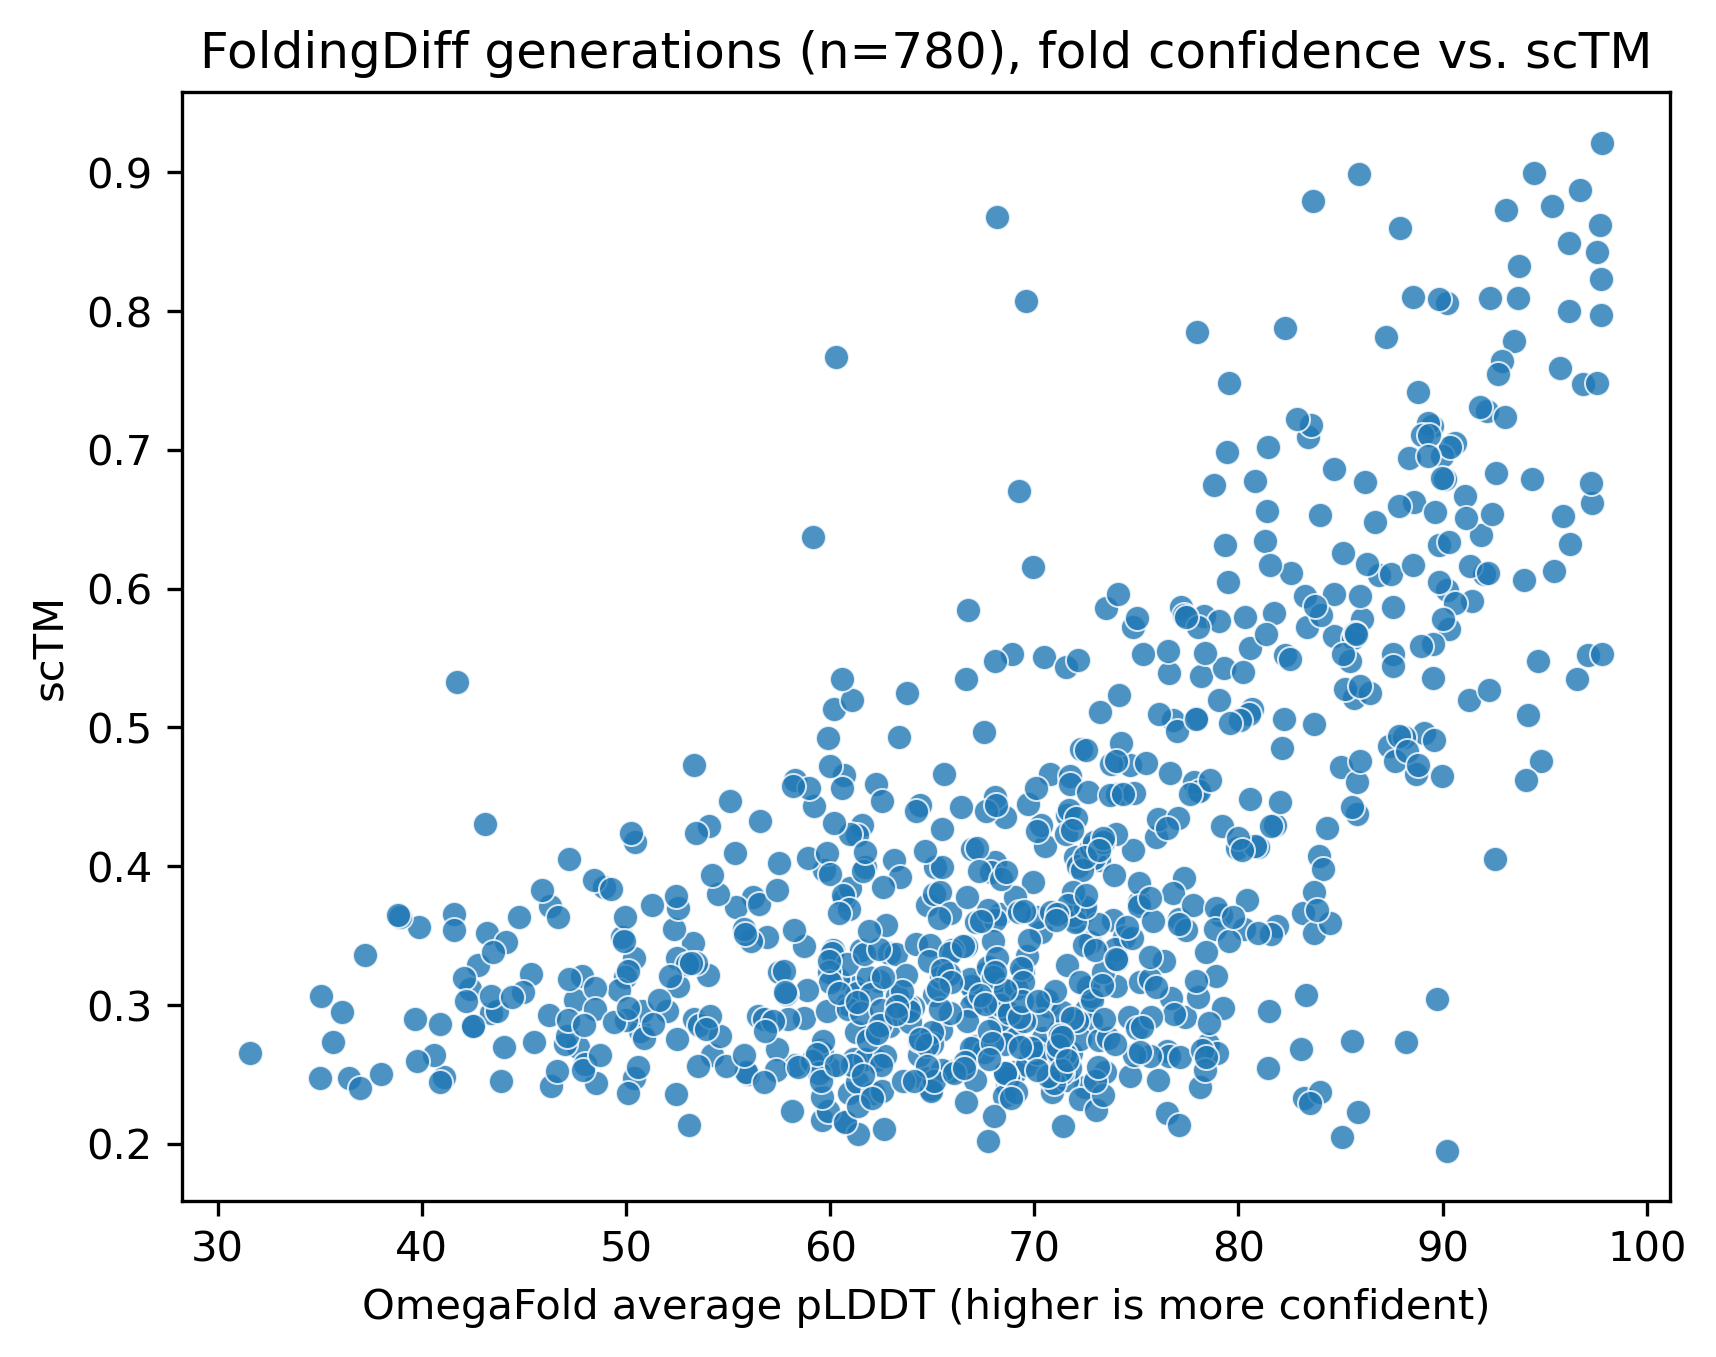

In [11]:
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(
    data=sctm_table,
    x='mean_bfactor_omegafold',
    y='scTM',
    alpha=0.8,
)
ax.set(
    xlabel="OmegaFold average pLDDT (higher is more confident)",
    ylabel="scTM",
    title="FoldingDiff generations (n=780), fold confidence vs. scTM"
)
fig.show()

## AlphaFold2 versions

In [7]:
af_sctm_table = pd.read_csv(
    "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/sctm_scores_proteinmpnn_af_tm_scores.csv",
    index_col=0,
)
af_sctm_table.head()

,id,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable
0,generated_202,0.39118,0.46674,70,1,3,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False
1,generated_414,0.33803,0.46756,91,2,2,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
2,generated_309,0.50278,0.60337,80,4,0,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),True
3,generated_529,0.27896,0.36524,102,0,6,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
4,generated_194,0.40617,0.47160,69,3,2,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False


In [8]:
alphafold_base_dir = "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/alphafold_predictions_proteinmpnn_done"

af_b_factor_values = []
for best_sctm in af_sctm_table['scTM best match']:
    pdb_fname = os.path.join(alphafold_base_dir, os.path.basename(best_sctm))
    assert os.path.isfile(pdb_fname)
    af_b_factor_values.append(get_bfactors(pdb_fname).mean())
af_sctm_table['mean_bfactor_alphafold'] = af_b_factor_values
af_sctm_table.head()

,id,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable,mean_bfactor_alphafold
0,generated_202,0.39118,0.46674,70,1,3,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False,59.997271
1,generated_414,0.33803,0.46756,91,2,2,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False,58.185164
2,generated_309,0.50278,0.60337,80,4,0,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),True,82.509084
3,generated_529,0.27896,0.36524,102,0,6,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False,67.269815
4,generated_194,0.40617,0.47160,69,3,2,alphafold_predictions_proteinmpnn_done/generat...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False,61.950612


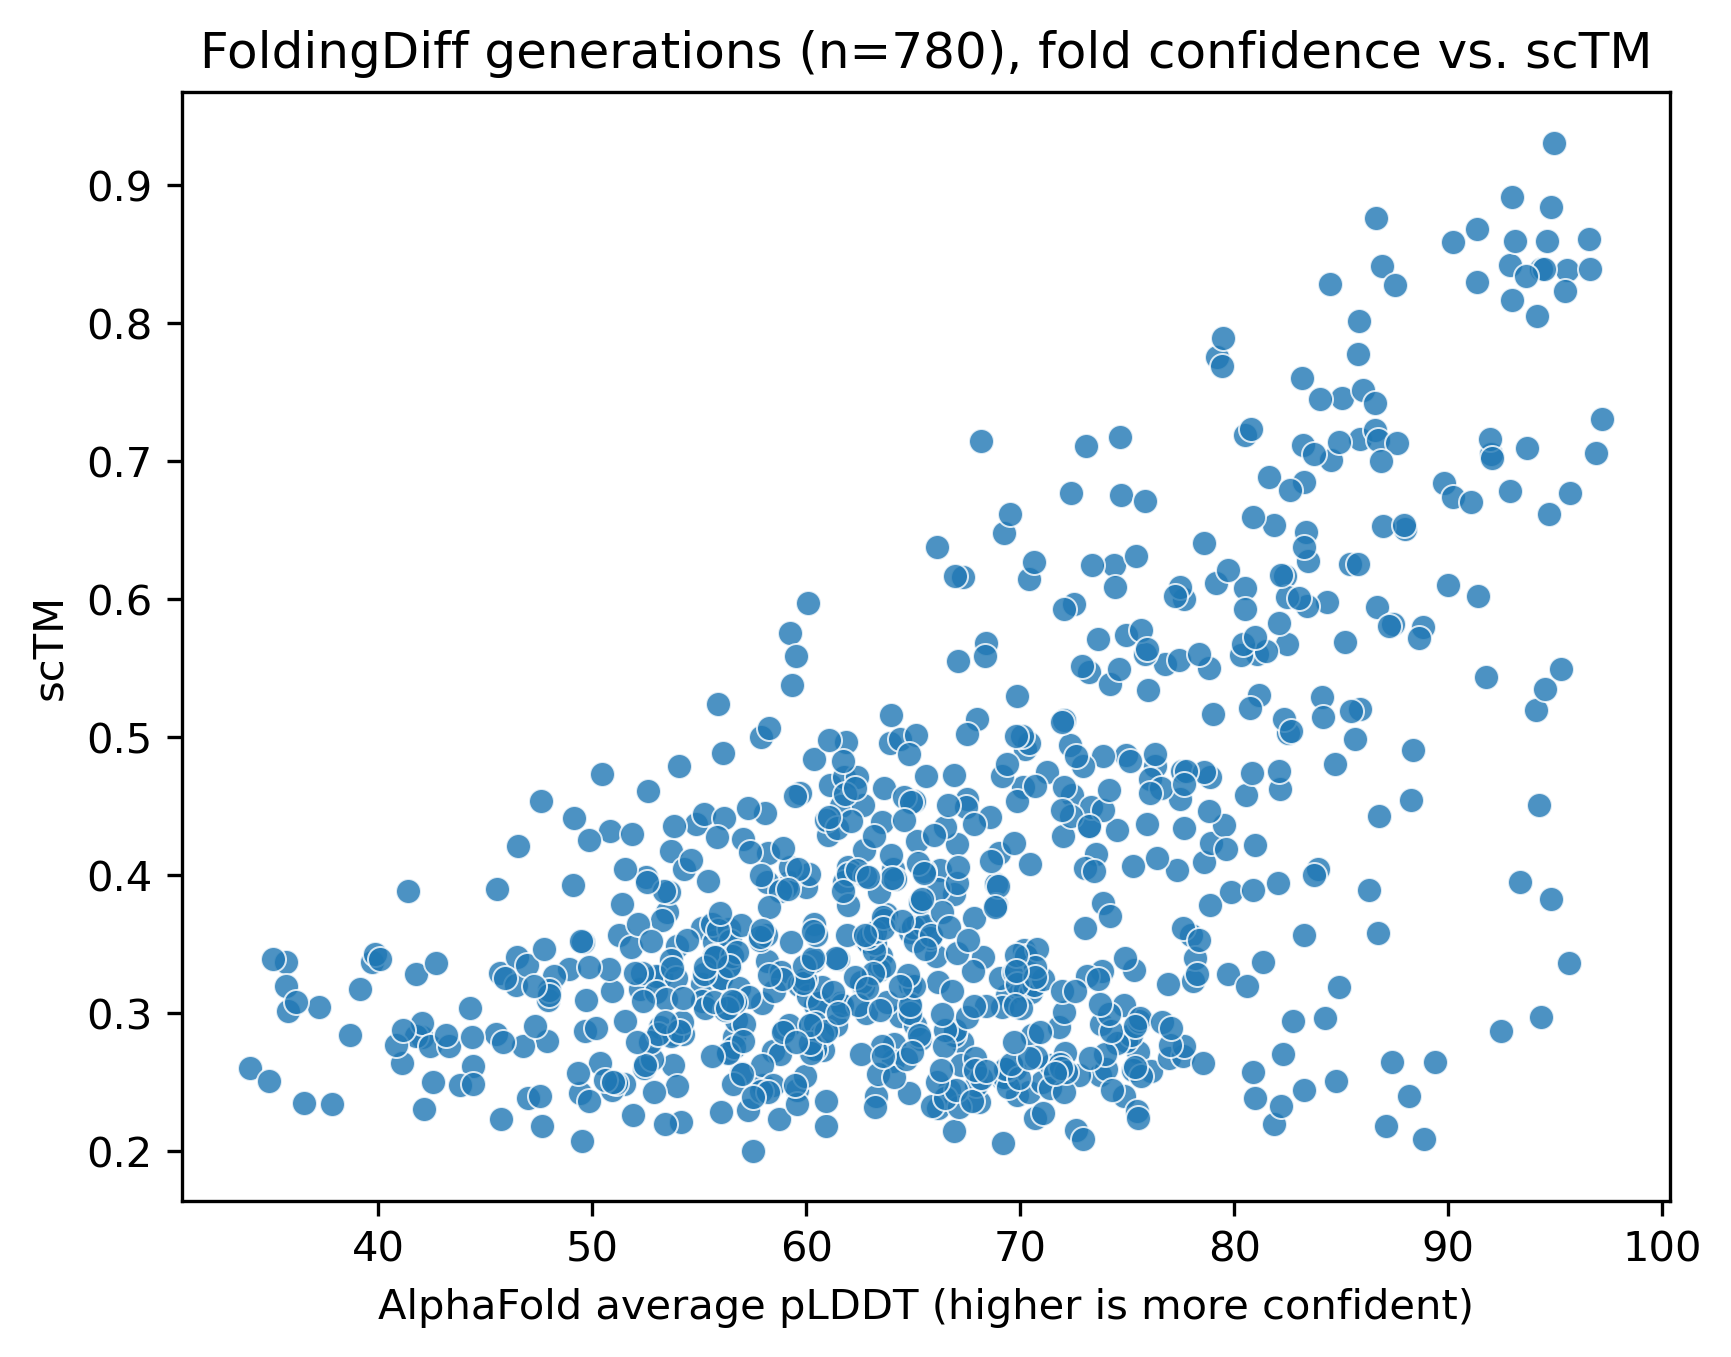

In [12]:
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(
    data=af_sctm_table,
    x='mean_bfactor_alphafold',
    y='scTM',
    alpha=0.8,
)
ax.set(
    xlabel="AlphaFold average pLDDT (higher is more confident)",
    ylabel="scTM",
    title="FoldingDiff generations (n=780), fold confidence vs. scTM"
)
fig.show()

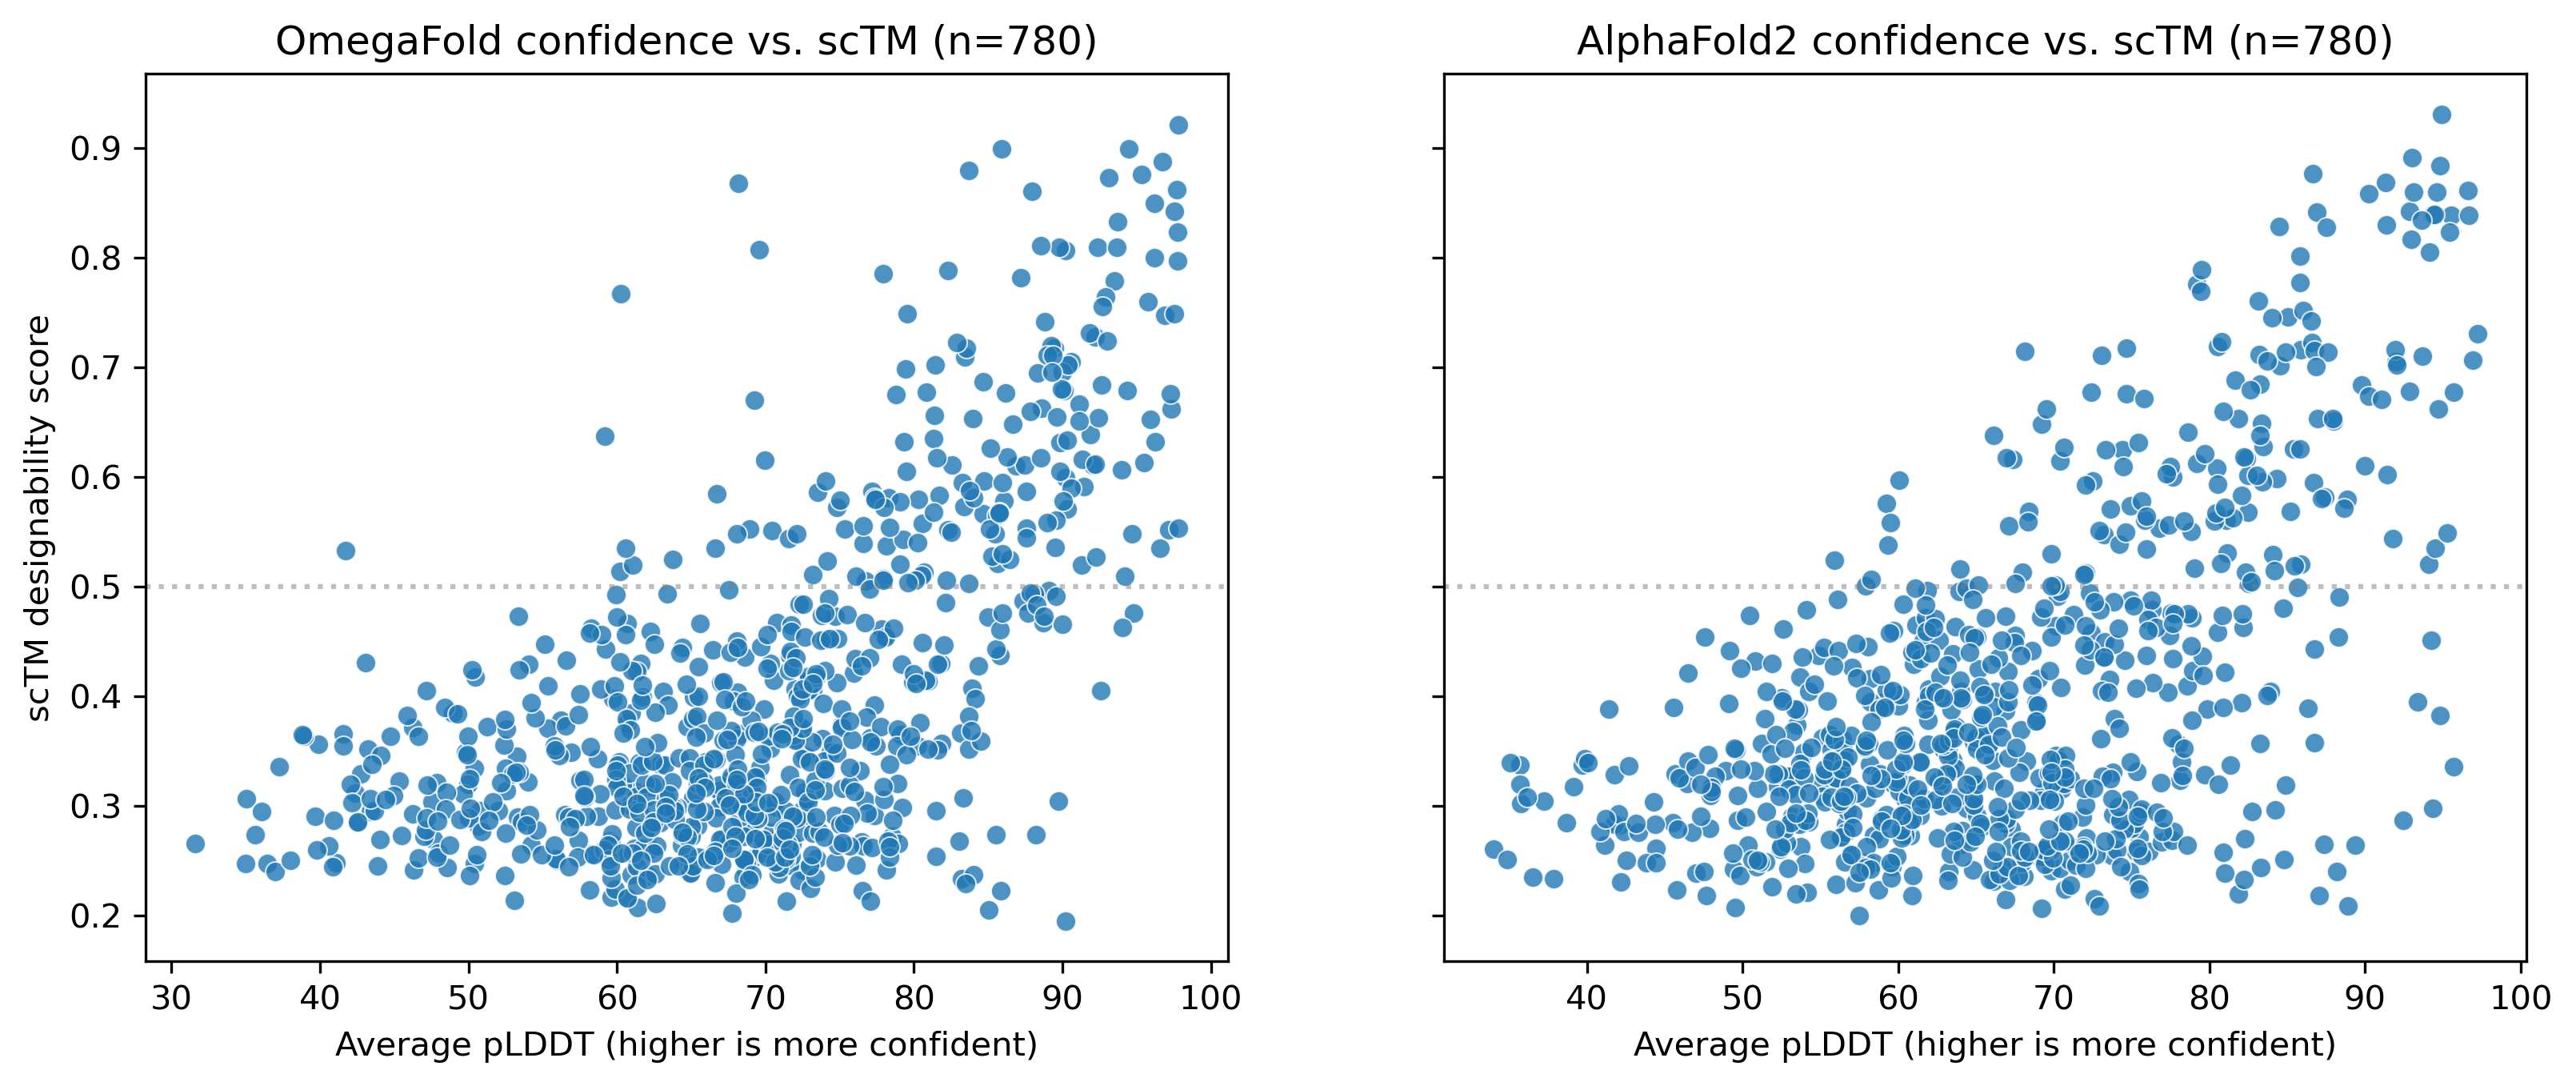

In [37]:
fig, (ax1, ax2) = plt.subplots(dpi=300, ncols=2, sharey=True, figsize=(6.4 * 2, 4.8))
sns.scatterplot(
    data=sctm_table,
    x='mean_bfactor_omegafold',
    y='scTM',
    alpha=0.8,
    ax=ax1,
)
ax1.axhline(0.5, color='tab:grey', alpha=0.5, linestyle='dotted')
sns.scatterplot(
    data=af_sctm_table,
    x='mean_bfactor_alphafold',
    y='scTM',
    alpha=0.8,
    ax=ax2,
)
ax2.axhline(0.5, color='tab:grey', alpha=0.5, linestyle='dotted')

ax1.set(
    xlabel="Average pLDDT (higher is more confident)",
    ylabel="scTM designability score",
    title="OmegaFold confidence vs. scTM (n=780)",
)
ax2.set(
    xlabel="Average pLDDT (higher is more confident)",
    title="AlphaFold2 confidence vs. scTM (n=780)",
)
# fig.suptitle("FoldingDiff generations (n=780), fold confidence vs. scTM", size=15)

fig.savefig(
    os.path.join(plotting.PLOT_DIR, "sctm_vs_plddt.pdf"),
    bbox_inches='tight',
)
fig.show()